Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('Train')
data_dir_test = pathlib.Path('Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#data_dir_train="https://drive.google.com/drive/folders/13-bFrrTNHAXBlD0WAGi_PxJkmDKLgVA7?usp=drive_link"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size =(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)
print("number of Classes :" , num_classes)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
number of Classes : 9


In [11]:
# Create a DataFrame with class names and corresponding labels
original_df = pd.DataFrame({ 'Class_Name': class_names, 'Label': range(len(class_names)) })
original_df

,Class_Name,Label
0,actinic keratosis,0
1,basal cell carcinoma,1
2,dermatofibroma,2
3,melanoma,3
4,nevus,4
5,pigmented benign keratosis,5
6,seborrheic keratosis,6
7,squamous cell carcinoma,7
8,vascular lesion,8


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the data

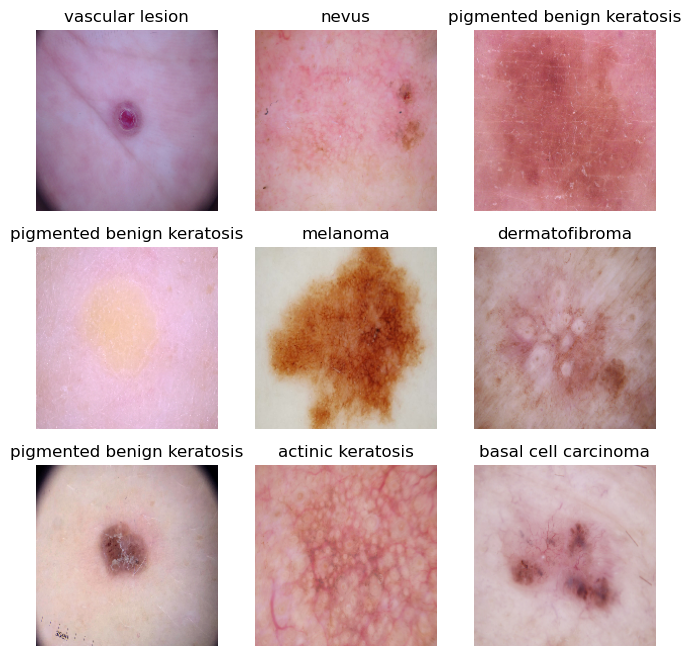

In [12]:
import matplotlib.pyplot as plt

def plot_images(dataset, class_names):
    plt.figure(figsize=(8, 8))
    for images, labels in dataset.take(1):
        for i in range(9):  # Display the first 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            class_label = class_names[labels[i].numpy()]  # Get the class name
            plt.title(class_label)
            plt.axis("off")  # Turn off the axis


# Assuming train_ds is your training dataset
plot_images(train_ds, class_names)
plt.show()



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential



# Define the model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values from 0-255 to 0-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


C:\Users\Ekansh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
"""
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential

# Define the model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values from 0-255 to 0-1
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Assuming you have your datasets and class weights defined as before, you can now proceed with training your model.


C:\Users\Ekansh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
"""
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Sequential
from sklearn.utils import class_weight
import numpy as np

# Define the model
model = Sequential([
    layers.Lambda(lambda x: x / 255.0, input_shape=(img_height, img_width, 3)),  # Normalization using Lambda
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

"""


C:\Users\Ekansh\anaconda3\Lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
"""
# Calculate class weights
y_train = np.array(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'])  # Replace with your training labels
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(enumerate(class_weights))
"""

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.1726 - loss: 2.0624 - val_accuracy: 0.3043 - val_loss: 2.0225
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.2077 - loss: 2.0027 - val_accuracy: 0.2192 - val_loss: 2.0029
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 0.2529 - loss: 1.9986 - val_accuracy: 0.3132 - val_loss: 1.9813
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.2325 - loss: 1.9762 - val_accuracy: 0.3333 - val_loss: 1.9745
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.2369 - loss: 1.9819 - val_accuracy: 0.3669 - val_loss: 1.9031
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.2755 - loss: 1.9533 - val_accuracy: 0.3356 - val_loss: 1.8696
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.2881 - loss: 1.9454 - val_accuracy: 0.4318 - val_loss: 1.7901
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.3455 - loss: 1.8394 - val_accu

### Visualizing training results

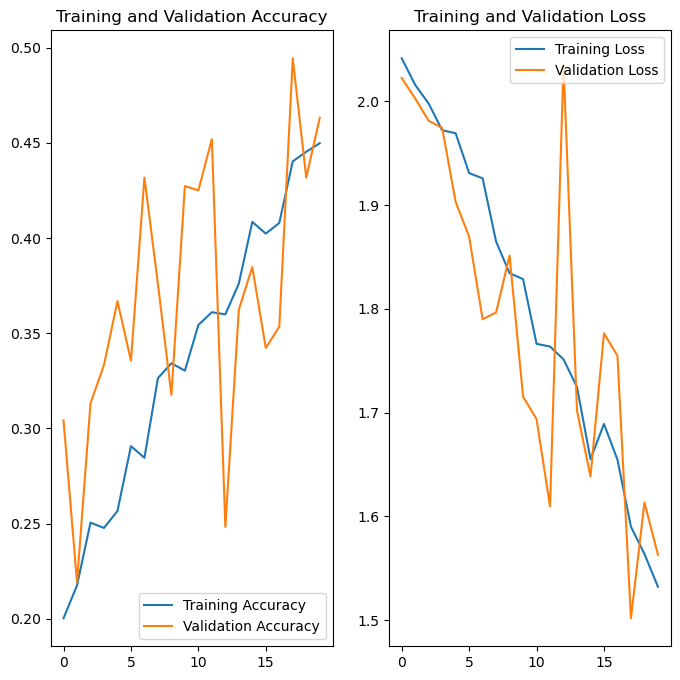

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

In [ ]:
#Trying the same model with Adam optimizer

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the model

In [24]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 323ms/step - accuracy: 0.4125 - loss: 2.1460 - val_accuracy: 0.5034 - val_loss: 1.5074
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.5157 - loss: 1.3615 - val_accuracy: 0.5190 - val_loss: 1.3653
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - accuracy: 0.5828 - loss: 1.2200 - val_accuracy: 0.5391 - val_loss: 1.3221
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.5825 - loss: 1.1798 - val_accuracy: 0.5436 - val_loss: 1.3478
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.6096 - loss: 1.0666 - val_accuracy: 0.5190 - val_loss: 1.4203
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 318ms/step - accuracy: 0.6244 - loss: 1.0246 - val_accuracy: 0.5391 - val_loss: 1.3429
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.7124 - loss: 0.8167 - val_accuracy: 0.5436 - val_loss: 1.3863
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.7167 - loss: 0.7778 - val_accu

### Visualizing training results

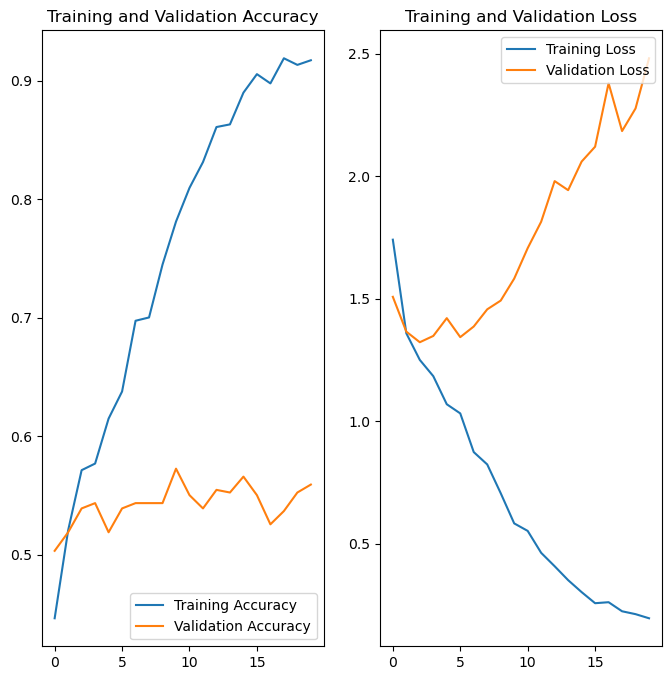

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
"""
#### With the Model selected optimizer 
1. With SGD ,the training and validation accurancy increases with Epoch but still the accuracy levels are less than 50%.
2. With Adam shows a case of Overfitting.

We can work on improving the accuracy by checking classs imbalance and Augmenting data and increasing the epoch in case of SGD as the training model with SGD shows generalised learning pattern.

In [19]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

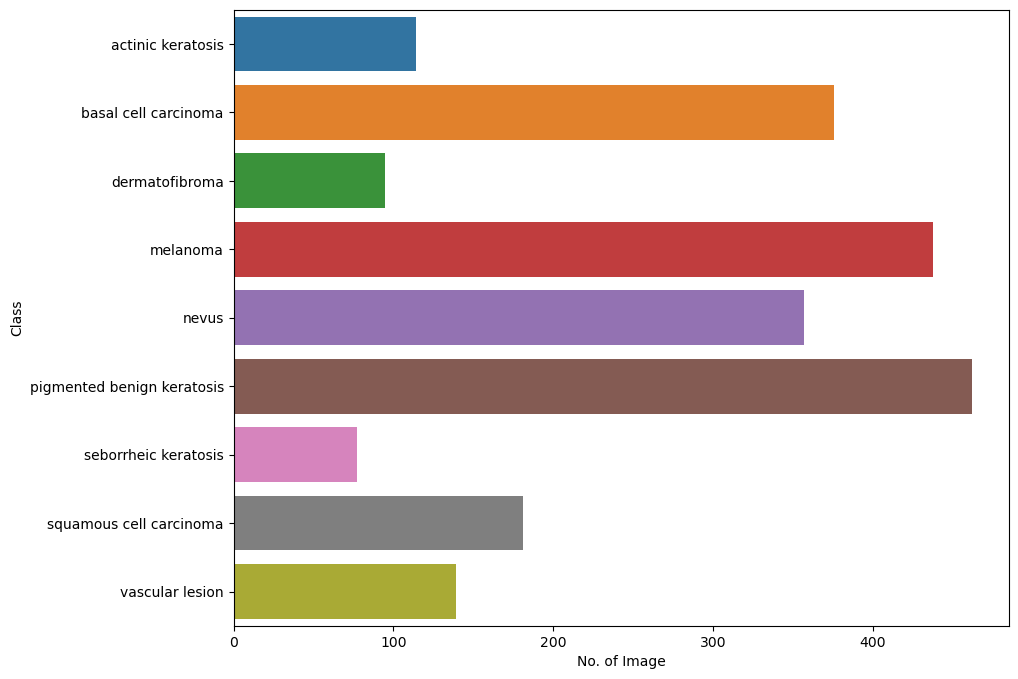

In [20]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

### Write your findings here

In [ ]:

We can work on improving the accuracy by checking classs imbalance and Augmenting data. 

In [21]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
#install Augmentor

!pip install Augmentor

In [22]:

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('Train/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3) 
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3) 
    p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse



Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21631F51450>: 100%|██████████| 500/500 [00:20<00:00, 23.98 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21632543E50>: 100%|██████████| 500/500 [00:20<00:00, 24.31 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x216325A3A50>: 100%|██████████| 500/500 [00:20<00:00, 24.26 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x21631F214D0>: 100%|██████████| 500/500 [02:13<00:00,  3.75 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x21632542750>: 100%|██████████| 500/500 [01:58<00:00,  4.23 Samples/s]                


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21631F33450>: 100%|██████████| 500/500 [00:21<00:00, 23.73 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21631D16950>: 100%|██████████| 500/500 [00:57<00:00,  8.73 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21631E9C6D0>: 100%|██████████| 500/500 [00:21<00:00, 22.99 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x216325CF0D0>: 100%|██████████| 500/500 [00:21<00:00, 23.72 Samples/s]                  


In [26]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [28]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [30]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


df2

,Path,Label
0,Train\actinic keratosis\output\actinic keratos...,actinic keratosis
1,Train\actinic keratosis\output\actinic keratos...,actinic keratosis
2,Train\actinic keratosis\output\actinic keratos...,actinic keratosis
3,Train\actinic keratosis\output\actinic keratos...,actinic keratosis
4,Train\actinic keratosis\output\actinic keratos...,actinic keratosis
...,...,...
4495,Train\vascular lesion\output\vascular lesion_o...,vascular lesion
4496,Train\vascular lesion\output\vascular lesion_o...,vascular lesion
4497,Train\vascular lesion\output\vascular lesion_o...,vascular lesion
4498,Train\vascular lesion\output\vascular lesion_o...,vascular lesion


In [32]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

#### **Todo:** Create a training dataset

In [33]:
#data_dir_train=pathlib.Path('Train')
ag_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [34]:
ag_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ag_train_ds = ag_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ag_val_ds = ag_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Using same above model layer with last layer of added softmax and dropout of 25% in last layer increased training data.

In [37]:
# Define the model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values from 0-255 to 0-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes,activation='softmax')
])

In [44]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the model

In [45]:
epochs = 20
history = model.fit(
  ag_train_ds,
  validation_data=ag_val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 319ms/step - accuracy: 0.1565 - loss: 2.1692 - val_accuracy: 0.1403 - val_loss: 2.1937
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 295ms/step - accuracy: 0.1952 - loss: 2.1077 - val_accuracy: 0.1396 - val_loss: 2.3691
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 300ms/step - accuracy: 0.2220 - loss: 2.0536 - val_accuracy: 0.2108 - val_loss: 2.0727
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.2566 - loss: 1.9165 - val_accuracy: 0.2249 - val_loss: 2.0618
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.2970 - loss: 1.8509 - val_accuracy: 0.3200 - val_loss: 1.7284
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 293ms/step - accuracy: 0.3422 - loss: 1.7550 - val_accuracy: 0.3415 - val_loss: 1.7869
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - accuracy: 0.3706 - loss: 1.6763 - val_accuracy: 0.3957 - val_loss: 1.5767
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.3923 - loss: 1

### Visualizing training results

In [47]:
epochs = 20
history_continued = model.fit(
  ag_train_ds,
  validation_data=ag_val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 288ms/step - accuracy: 0.6487 - loss: 0.9503 - val_accuracy: 0.6414 - val_loss: 0.9891
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 46s 274ms/step - accuracy: 0.6775 - loss: 0.8931 - val_accuracy: 0.6021 - val_loss: 1.0648
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 277ms/step - accuracy: 0.6736 - loss: 0.9258 - val_accuracy: 0.6711 - val_loss: 0.8902
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 46s 275ms/step - accuracy: 0.7026 - loss: 0.8219 - val_accuracy: 0.6785 - val_loss: 0.8925
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.7336 - loss: 0.7202 - val_accuracy: 0.6674 - val_loss: 0.8750
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 48s 284ms/step - accuracy: 0.7461 - loss: 0.7255 - val_accuracy: 0.6711 - val_loss: 0.8887
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.7598 - loss: 0.6646 - val_accuracy: 0.7105 - val_loss: 0.8201
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.7667 - loss: 0

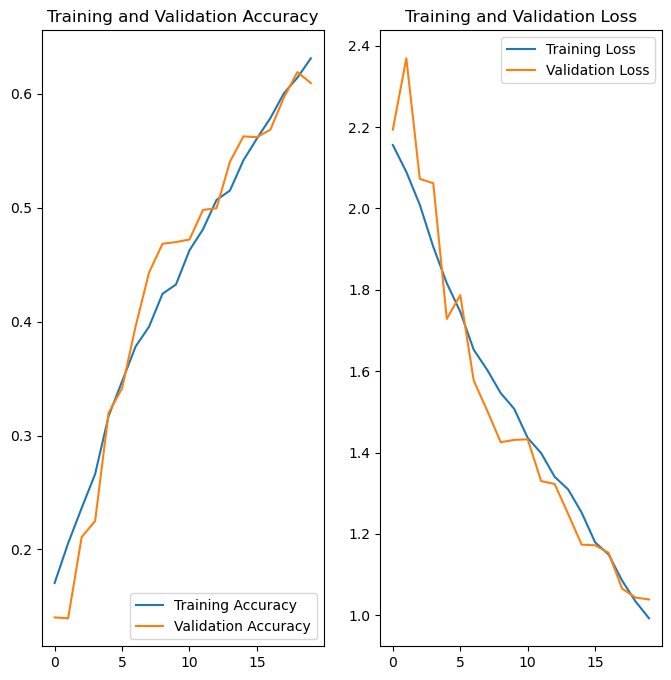

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

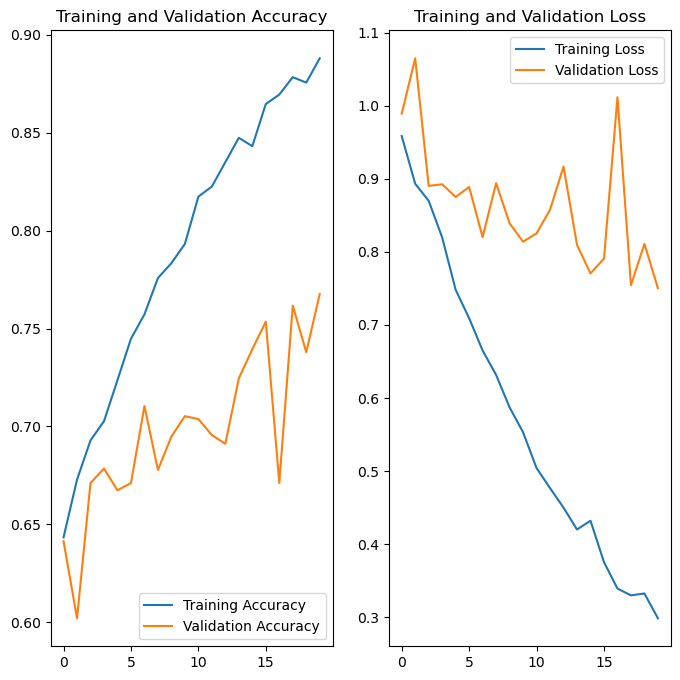

In [48]:
acc = history_continued.history['accuracy']
val_acc = history_continued.history['val_accuracy']

loss = history_continued.history['loss']
val_loss = history_continued.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

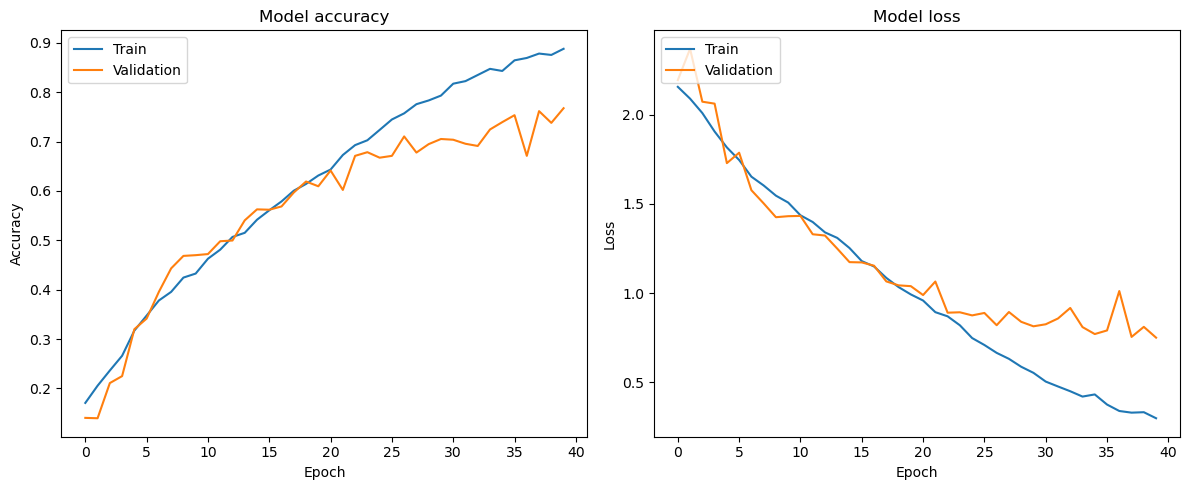

In [49]:
import matplotlib.pyplot as plt

# Combine the histories
history_dict = {key: history.history[key] + history_continued.history[key] for key in history.history.keys()}

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Comapring the gprahs pre and post augemtation for managing class imbalance , we can clearly see a smooth and high learning and validation accuracy at later model with same epoch. 

Even after 40 epoch with SGD there is an incremental improvement with model training and validation accuracy but post 25 epochs, the accurancy  variance gaps increases.  


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the model

In [51]:
epochs = 20
history = model.fit(
  ag_train_ds,
  validation_data=ag_val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - accuracy: 0.4899 - loss: 1.9611 - val_accuracy: 0.5367 - val_loss: 1.2424
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 312ms/step - accuracy: 0.6078 - loss: 1.0669 - val_accuracy: 0.6221 - val_loss: 1.0597
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 315ms/step - accuracy: 0.6746 - loss: 0.8646 - val_accuracy: 0.6785 - val_loss: 0.9378
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 310ms/step - accuracy: 0.7546 - loss: 0.6616 - val_accuracy: 0.6889 - val_loss: 0.9066
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.8023 - loss: 0.5622 - val_accuracy: 0.6927 - val_loss: 0.8754
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.8176 - loss: 0.4735 - val_accuracy: 0.6993 - val_loss: 0.8855
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 310ms/step - accuracy: 0.8542 - loss: 0.3896 - val_accuracy: 0.7275 - val_loss: 0.8818
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 310ms/step - accuracy: 0.8726 - loss: 0

### Visualizing training results

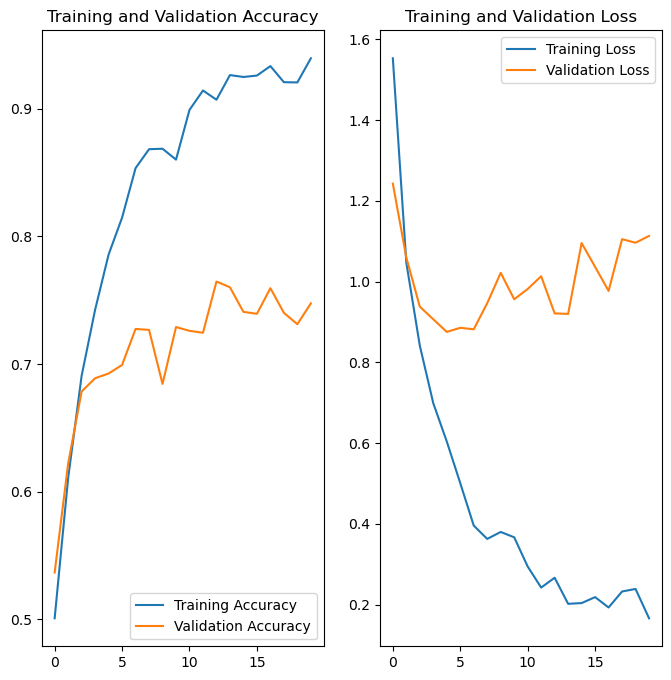

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:** Create your model (make sure to include normalization)

In [53]:
## your code goes here
from tensorflow.keras import layers, Sequential

# Define the model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values from 0-255 to 0-1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D(pool_size=(2, 2)),  # Use (2,2) pooling window
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D(pool_size=(2, 2)),  # Use (2,2) pooling window
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.MaxPooling2D(pool_size=(2, 2)),  # Use (2,2) pooling window
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),  # Add Dropout with 25% rate before the softmax layer
    layers.Dense(num_classes, activation='softmax')  # Assuming num_classes is defined
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,249 (15.22 MB)

 Trainable params: 3,990,025 (15.22 MB)

 Non-trainable params: 224 (896.00 B)

In [56]:
%pip install pydot
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Note: you may need to restart the kernel to use updated packages.
You must install pydot (`pip install pydot`) for `plot_model` to work.


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [61]:
#Compile the Model

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#### **Todo:**  Train your model

In [62]:
epochs = 20
history = model.fit(
    ag_train_ds, 
    validation_data=ag_val_ds, 
    epochs=epochs,
    callbacks=[checkpoint,earlystop]
)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.2935 - loss: 2.5451
Epoch 1: val_accuracy improved from -inf to 0.18189, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 699ms/step - accuracy: 0.2939 - loss: 2.5413 - val_accuracy: 0.1819 - val_loss: 4.6213
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.4627 - loss: 1.4281
Epoch 2: val_accuracy improved from 0.18189 to 0.30215, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 119s 703ms/step - accuracy: 0.4628 - loss: 1.4279 - val_accuracy: 0.3022 - val_loss: 2.4382
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.5472 - loss: 1.1950
Epoch 3: val_accuracy improved from 0.30215 to 0.51819, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 114s 677ms/step - accuracy: 0.5473 - loss: 1.1949 - val_accuracy: 0.5182 - val_loss: 1.3677
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.6236 - loss: 1.0385
Epoch 4: val_accuracy improved from 

#### **Todo:**  Visualize the model results

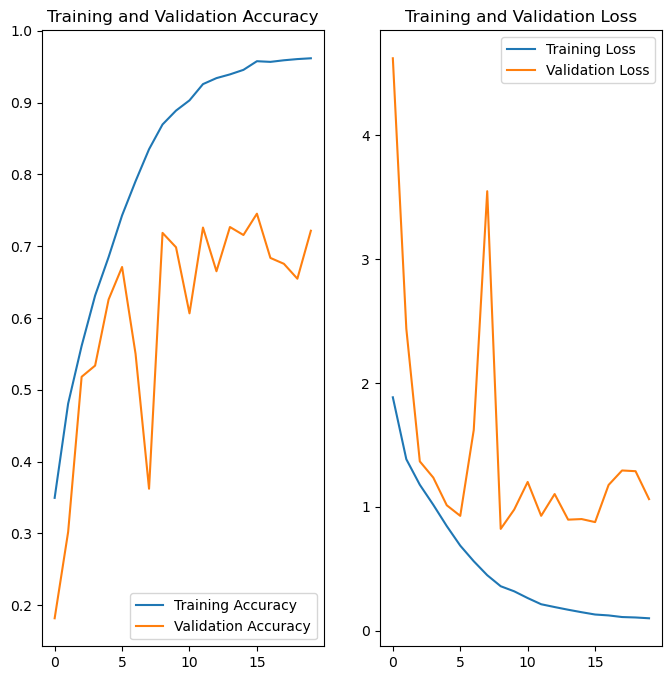

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
### Trying a final new model using Adam wihtout BatchNormalization.

In [65]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [67]:
#Compile the Model

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#### **Todo:**  Train your model

In [68]:
epochs = 20
history = model.fit(
    ag_train_ds, 
    validation_data=ag_val_ds, 
    epochs=epochs,
    callbacks=[checkpoint,earlystop]
)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.2042 - loss: 2.1595
Epoch 1: val_accuracy improved from -inf to 0.38382, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 150s 874ms/step - accuracy: 0.2046 - loss: 2.1582 - val_accuracy: 0.3838 - val_loss: 1.6001
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.3957 - loss: 1.5925
Epoch 2: val_accuracy improved from 0.38382 to 0.44692, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 875ms/step - accuracy: 0.3957 - loss: 1.5923 - val_accuracy: 0.4469 - val_loss: 1.4469
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.4397 - loss: 1.4468
Epoch 3: val_accuracy did not improve from 0.44692
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 857ms/step - accuracy: 0.4397 - loss: 1.4469 - val_accuracy: 0.4284 - val_loss: 1.4855
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.4862 - loss: 1.3634
Epoch 4: val_accuracy improved from 0.44692 to 0.52635, saving model 

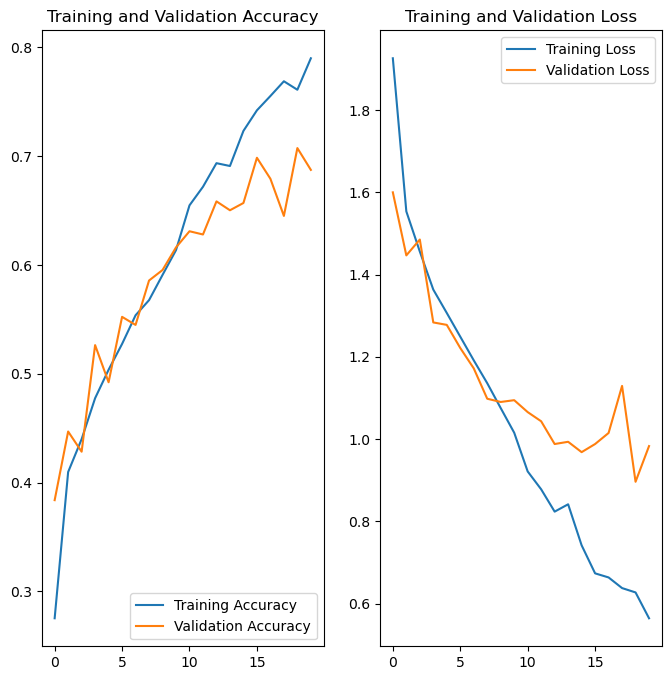

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Prepare the test data with normalization only (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Load the test data
test_generator = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 118 images belonging to 9 classes.


C:\Users\Ekansh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.1209 - loss: 131.6025
Test Accuracy: 13.56%


4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1209 - loss: 130.1312


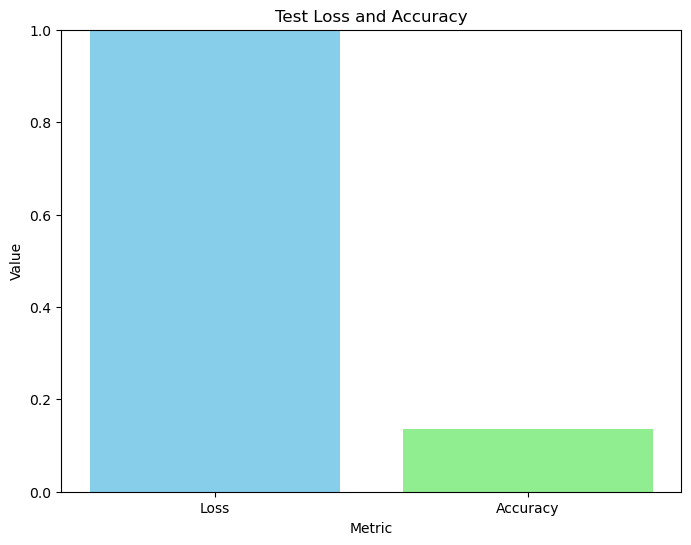

In [72]:
import matplotlib.pyplot as plt

# Assuming you have already evaluated the model and obtained test_loss and test_accuracy
test_loss, test_accuracy = model.evaluate(test_generator)

# Plot the test loss and accuracy
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Loss and Accuracy')
plt.ylim(0, 1)  # Assuming loss and accuracy are between 0 and 1
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Actual Class: basal cell carcinoma
Predicted Class: squamous cell carcinoma


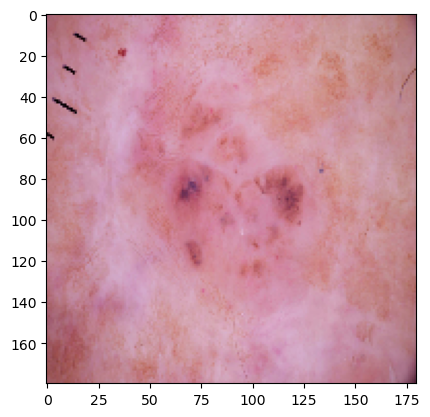

In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming data_dir_test and class_names are defined
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1], target_size=(180, 180))  # Corrected load_img
Test_image_array = img_to_array(Test_image)  # Convert the image to array for expansion
plt.imshow(Test_image)
plt.grid(False)

# Preprocess the image
img = np.expand_dims(Test_image_array, axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]

print("Actual Class: " + class_names[1] + '\n' + "Predicted Class: " + pred_class)


In [73]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

NameError: name 'load_img' is not defined

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

